## 1. How many responders are there? Are there any missing values in any of the variables?

In [1]:
import pandas as pd
salary_data = pd.read_csv('salary.csv') 
print(f"There are {len(salary_data)} respondents")
print(salary_data.isnull().values.any())
print(salary_data.isna().values.any())

There are 514 respondents
True
True


## 2. What is the lowest salary and highest salary in the group?
From looking at the we can see that the salaries have a relatively large range.

In [2]:
lowest = salary_data['salary'].min()
print(f'The lowest salary is {lowest}')
highest = salary_data['salary'].max()
print(f'The highest salary is {highest}')

The lowest salary is 29000.0
The highest salary is 96156.0


# 3. What is the mean salary for the sample? Include the standard error of the mean.


In [3]:
from scipy import stats
mean = salary_data['salary'].mean()
print(f'The mean salary is {mean}')
sem = salary_data['salary'].sem()
print(f'The standard error of salary is {sem}')

The mean salary is 50863.22009783626
The standard error of salary is 560.0622753925232


# 4.What is the standard deviation for the years worked?


In [4]:
import numpy as np
std = np.std(salary_data['yearsworked'])
print(f'The standard deviation is {std}')

The standard deviation is 9.435503224576884


# 5. What is the median salary for the sample?


In [5]:
median = salary_data['salary'].median()
print(f'The median salary is {median}')

The median salary is 50096.0


# 6. What is the interquartile range for salary in the sample?


In [6]:
import numpy as np
q1 = salary_data['salary'].quantile(0.25)
q3 = salary_data['salary'].quantile(0.75)
iqr = q3-q1
print(iqr)

20345.0


# 7. How many men are there in the sample? How many women are there in the sample? Present this information in a table.
There is a large number of executives are unevenly distributed there are too little female executives

In [7]:
table = salary_data['male'].value_counts() 
table.index = ['male','female']
k = table.to_frame() 
k.rename(columns={'male': 'gender'}, inplace=True)
k

,gender
male,386
female,128


# 8. How many women are executives compared to men?

In [19]:
executive = salary_data[salary_data['position'] == 3]
e = executive['male'].value_counts()
comparison = e.iloc[0] - e.iloc[1]
print(f'There are {e.iloc[0]} male executives')
print(f'There are {e.iloc[1]} female executives')
print(f'There are {comparison} more male executives compared to women')

There are 192 male executives
There are 19 female executives
There are 173 more male executives compared to women


# 9. Create a histogram for the variable Salary.


In [9]:
import matplotlib.pyplot as plt
salary_data.hist(column='salary',grid=False)
plt.xlabel('Amount')
plt.ylabel('Number of people')
plt.show()

<Figure size 640x480 with 1 Axes>

# 10. Examine the histogram and describe the distribution for Salary.


A left-skewed distribution: a large number of people are on the left side of the graph from this we can conclude
most people earn in the low/medium range of salaries

# 11. Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?


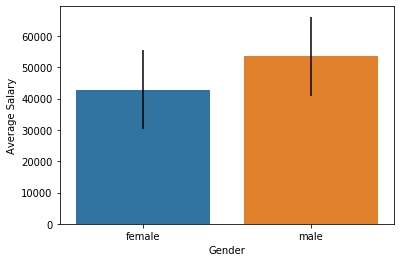

In [20]:
import seaborn as sns
average_salary = salary_data['salary'].groupby(salary_data['male']).mean()
average_salary = average_salary.to_frame()
average_salary.index = ['female','male']
std_s = salary_data['salary'].std()
sns.barplot(x=average_salary.index, y="salary", data=average_salary, yerr=std_s )
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

Men have a higher average salary than women. From this we can determine that men are more likely earn more money. As determined before there are more male executives than female executives and this could be one of the reasons why men have a higher average salary.

# 12. Create a scatterplot with seaborn showing the relationship between Years Worked and Salary (don’t forget to insert a trend line).  

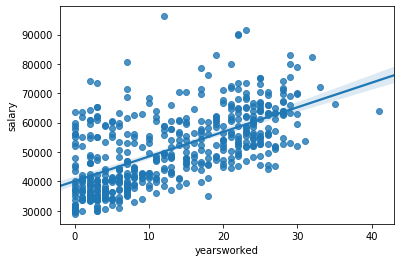

In [35]:
sns.regplot(x = salary_data['yearsworked'], y = salary_data['salary'])
plt.show()

In [30]:
salary_data.loc[salary_data['salary'] == salary_data['salary'].max()]

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,male,Field,yearsabs
377,96156.0,20,12,12,1.19,1,0,3,1,1,2


We can interpret from this graph that the more expericence you have the more likely you are to earn more money. There is a higher concentration of data below the line. So for whichever number of years you've worked. You are more likely to be in the lower/medium range salary relative to your peers who have the same number of years as you. People also tend to only spend 30 years in a single career.There is an unusual value where someone has 12 years experience and earns 96156.0. This could be due to the fact that they have 20 years prior experience to the 12, so that 20 years could be of value to their current job. They have a degreee. It is also a male as seen from previous graphs men tend to earn more. They are also in an executive position.


# 13. Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.

In [13]:
from scipy.stats import pearsonr
df = salary_data.dropna(subset=['salary'])
p = pearsonr(df['yearsworked'], df['salary'])
print(p)

(0.6235888657598045, 1.2873351342921916e-56)


There is a moderate correlation between years worked and salary. The p-value is close to 0, this means there is very little to almost no correlation. Therefore, years does not really affect the salary you earn.